In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from animate import *
plt.style.use('custom_paper')

In [64]:
df = pd.read_csv('get_monthly_submissions.csv')
dates = np.array([v.split('-') for v in df['month'].values])
years = dates[:,0]
months = dates[:,1]
df['yr'] = years
df['mo'] = months
df['day'] = 1
df

,month,submissions,historical_delta,yr,mo,day
0,1991-07,2,-2,1991,07,1
1,1991-08,28,-1,1991,08,1
2,1991-09,58,0,1991,09,1
3,1991-10,76,0,1991,10,1
4,1991-11,64,0,1991,11,1
...,...,...,...,...,...,...
378,2023-01,13870,0,2023,01,1
379,2023-02,14863,0,2023,02,1
380,2023-03,18249,0,2023,03,1
381,2023-04,15010,0,2023,04,1


In [65]:
subdf=pd.DataFrame([])
subdf['year']=df['yr'].astype(int)
subdf['month']=df['mo'].astype(int)
subdf['day']=df['day'].astype(int)

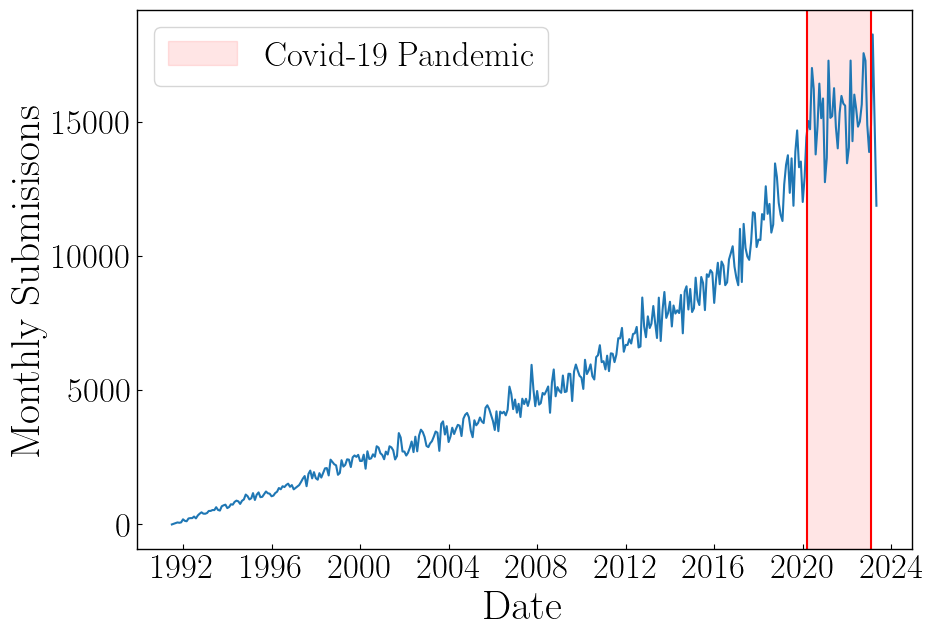

In [78]:
plt.plot(pd.to_datetime(subdf),df['submissions'])
plt.axvline(pd.to_datetime('2020-03-11'),c='r')
plt.axvline(pd.to_datetime('2023-01-30'),c='r')
plt.axvspan(pd.to_datetime('2020-03-11'), pd.to_datetime('2023-01-30'), alpha=0.1, color='red',label='Covid-19 Pandemic')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Monthly Submisisons")
plt.savefig("arxiv_growth.png")

## Raw Version, relative to the number of yearly submission

In [7]:
uyears = np.unique(df['yr'])[1:-1].astype(int)
scaled_year = (uyears-np.min(uyears))/(np.max(uyears)-np.min(uyears))
def makeplot(j):
    subyears= uyears[:j]
    monthlabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    fig,ax = plt.subplots(figsize=(15,7))
    for i in range(len(subyears)):
        year = subyears[i]
        color = cm.coolwarm(scaled_year[i])
        subdf = df[df['yr'].astype(int) == year]
        meansubmission = np.mean(subdf['submissions'])
        relsubmisisons = subdf['submissions']/meansubmission
        plt.plot(monthlabels,relsubmisisons,c=color,marker='o')
        plt.title(year,c=color)
        plt.xlabel("Month")
        plt.ylabel("Relative arXiv Submissions")
    return fig

In [8]:
savefigures(makeplot,np.arange(1,len(uyears)+1,1),'./arxiv_by_month/')
render('./arxiv_by_month/','arxiv_by_month','gifbyavi',runtime=10,cleanup_type='rm')

saving figures


100%|███████████████████████████████████████████| 31/31 [00:10<00:00,  2.95it/s]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora 

warning... less than 15 fps!
Framerate is 3 fps
Total Runtime is 10 s


Output #0, avi, to '../arxiv_by_month.avi':
  Metadata:
    ISFT            : Lavf58.76.100
  Stream #0:0: Video: mpeg4 (FMP4 / 0x34504D46), yuv420p(tv, progressive), 3752x2049 [SAR 1:1 DAR 3752:2049], q=2-31, 200 kb/s, 3 fps, 3 tbn
    Metadata:
      encoder         : Lavc58.134.100 mpeg4
    Side data:
      cpb: bitrate max/min/avg: 0/0/200000 buffer size: 0 vbv_delay: N/A
frame=   31 fps=0.0 q=0.0 Lsize=    2743kB time=00:00:10.33 bitrate=2174.7kbits/s speed=13.5x    
video:2737kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.232618%
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --en

## Normalized Version, relative to the number of yearly submission, then divided by a linear trend

In [9]:
uyears = np.unique(df['yr'])[1:-1].astype(int)
scaled_year = (uyears-np.min(uyears))/(np.max(uyears)-np.min(uyears))
def makeplot2(j):
    subyears= uyears[:j]
    monthlabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    fig,ax = plt.subplots(figsize=(15,7))
    for i in range(len(subyears)):
        year = subyears[i]
        color = cm.coolwarm(scaled_year[i])
        subdf = df[df['yr'].astype(int) == year]
        meansubmission = np.mean(subdf['submissions'])
        relsubmisisons = subdf['submissions']/meansubmission
        nmonths = subdf['mo'].astype(int)
        coeff = np.polyfit(nmonths,relsubmisisons,deg=1)
        #fit a line to the submissions over a year
        #then show relative normalized by line
#        plt.plot(nmonths,relsubmisisons,c=color,marker='o')
#        plt.plot(nmonths,np.polyval(coeff,nmonths),c='r',marker='o')
        plt.plot(monthlabels,relsubmisisons-np.polyval(coeff,nmonths),c=color,marker='o')
        plt.title(year,c=color)
        plt.xlabel("Month")
        plt.ylabel("Normalized arXiv Submissions")
    return fig

In [10]:
savefigures(makeplot2,np.arange(1,len(uyears)+1,1),'./norm_arxiv_by_month/')
render('./norm_arxiv_by_month/','norm_arxiv_by_month','gifbyavi',runtime=10,cleanup_type='rm')

saving figures


100%|███████████████████████████████████████████| 31/31 [00:11<00:00,  2.71it/s]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora 

warning... less than 15 fps!
Framerate is 3 fps
Total Runtime is 10 s


Output #0, avi, to '../norm_arxiv_by_month.avi':
  Metadata:
    ISFT            : Lavf58.76.100
  Stream #0:0: Video: mpeg4 (FMP4 / 0x34504D46), yuv420p(tv, progressive), 3833x2049 [SAR 1:1 DAR 3833:2049], q=2-31, 200 kb/s, 3 fps, 3 tbn
    Metadata:
      encoder         : Lavc58.134.100 mpeg4
    Side data:
      cpb: bitrate max/min/avg: 0/0/200000 buffer size: 0 vbv_delay: N/A
frame=   31 fps=0.0 q=0.0 Lsize=    3527kB time=00:00:10.33 bitrate=2795.8kbits/s speed=12.5x    
video:3520kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.180983%
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray

### bounds

In [11]:
uyears = np.unique(df['yr'])[1:-1].astype(int)
scaled_year = (uyears-np.min(uyears))/(np.max(uyears)-np.min(uyears))
subyears= uyears[:]
monthlabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig,ax = plt.subplots(figsize=(15,7))
rows = []
for i in range(len(subyears)):
    year = subyears[i]
    color = cm.coolwarm(scaled_year[i])
    subdf = df[df['yr'].astype(int) == year]
    meansubmission = np.mean(subdf['submissions'])
    relsubmisisons = subdf['submissions']/meansubmission
    nmonths = subdf['mo'].astype(int)
    coeff = np.polyfit(nmonths,relsubmisisons,deg=1)
    plt.plot(monthlabels,relsubmisisons-np.polyval(coeff,nmonths),c='r',alpha=0.2)
    plt.title('Submisisons Spread')
    rows.append(relsubmisisons-np.polyval(coeff,nmonths))
    plt.xlabel("Month")
    plt.ylabel("Normalized arXiv Submissions")

mean_norm = np.mean(rows,axis=0)
std_norm = np.std(rows,axis=0)
plt.plot(monthlabels,mean_norm,c='k',marker='o',lw=5)
plt.plot(monthlabels,mean_norm+std_norm,c='k',lw=2)
plt.plot(monthlabels,mean_norm-std_norm,c='k',lw=2)
plt.fill_between(monthlabels,mean_norm+std_norm,mean_norm-std_norm,color='k',alpha=0.2)
plt.axhline(0,c='grey',ls='--')
plt.savefig('submissions_spread.png')